- 다양한 곱셈 시나리오를 통해, right sm todense latency 와 sm * dm latency 측정
- 모든 측정 결과들에 대해, [ right sm todense latency / sm * dm latency ] 계산
- 전체 곱셈 시나리오 중, 20%의 시나리오에서 sm todense latency가 실제 sm * dm latency에 비해  큰 비율을 차지하는 것을 확인
    - 해당 결과는 matrix size, density 등의 다양한 원인들이 존재하기 때문에, 정확한 원인을 설명하긴 어려움

### CDF (cumulative distribution function)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/Users/bdlab/Desktop/matrix-data/spmm-latency/spmm-for-todense-ratio-2000-copy.csv")

,lr,lc,rc,ld,rd,lnnz,rnnz,right_sm_todense,sp_smdm,bz_smsm,right_sm_todense.1,bz_smdm,sp_todense_ratio
0,108176,10277,16847,0.025336,0.0100,28169438,1731551,330,1046768,195786,241,1219710,0.000315
1,113894,7882,5236,0.025336,0.1300,22745018,5365824,166,285441,162839,96,301817,0.000582
2,104630,9380,10427,0.025336,0.1500,24867579,14672396,331,565623,341557,262,627103,0.000585
3,100996,13196,2808,0.008605,0.0005,11468999,18533,53,80591,814,167,199559,0.000658
4,89490,74614,2024,0.009521,0.0010,63574769,151024,195,291891,20373,498,740885,0.000668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1026,83785,3762,0.000319,0.2000,27479,63048115,13796,2157,1211,1651,3377,6.395920
1994,3890,98343,5047,0.000005,0.1300,1775,64530805,14688,1837,474,23856,2623,7.995645
1995,224,50902,8959,0.000084,0.1500,962,68406475,14978,1692,412,16030,2315,8.852246
1996,455,44292,10041,0.000004,0.1000,87,44474989,10498,1177,277,12454,2642,8.919286


### sparse to dense overhead 1번째 figure

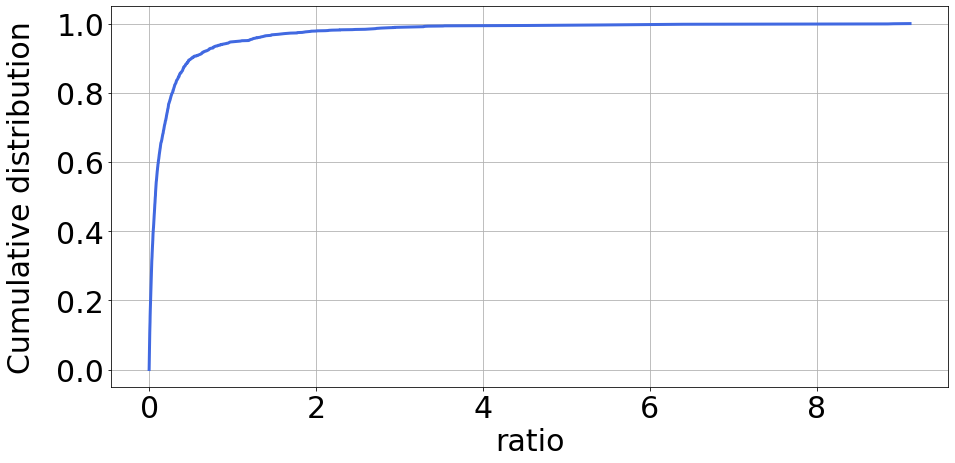

In [200]:
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams.update({'font.size': 30}) # 폰트사이즈 디폴트 설정
fig = plt.figure(figsize=(15,7))

# x 축으로 사용할 ratio
ratio = df['sp_todense_ratio']

# 배열의 모든 값을 1/1998 로 초기화
y = np.zeros(len(ratio)) + (1 / len(ratio))
# 누적 비율 생성
cdf = np.cumsum(y)

plt.grid(True)

plt.xticks([0,2,4,6,8])

plt.xlabel("ratio")
plt.ylabel("Cumulative distribution", labelpad=20)

plt.plot(ratio,cdf,linewidth=3, color = "royalblue")
fig.savefig('./sparse-to-dense-overhead-v2-first.png')
plt.show()

### sparse to dense overhead 2번째 figure

In [201]:
# import numpy as np
# import matplotlib.pyplot as plt 

# plt.rcParams.update({'font.size': 30}) # 폰트사이즈 디폴트 설정
# fig = plt.figure(figsize=(15,7))

# # 상위 20% ratio 뽑기
# ratio_top_20 = ratio[int(len(ratio)*0.8):]
# cdf_top_20 = cdf[int(len(ratio)*0.8):]

# plt.grid(True)

# plt.xlabel("ratio")
# plt.ylabel("Cumulative distribution", labelpad=20)

# plt.plot(ratio_top_20,cdf_top_20,linewidth=3, color = "royalblue")
# fig.savefig('./sparse-to-dense-overhead-v2-second.png')
# plt.show()

### sparse to dense overhead 2번째 figure, 일부 데이터가 전체 데이터인 것 처럼 수정

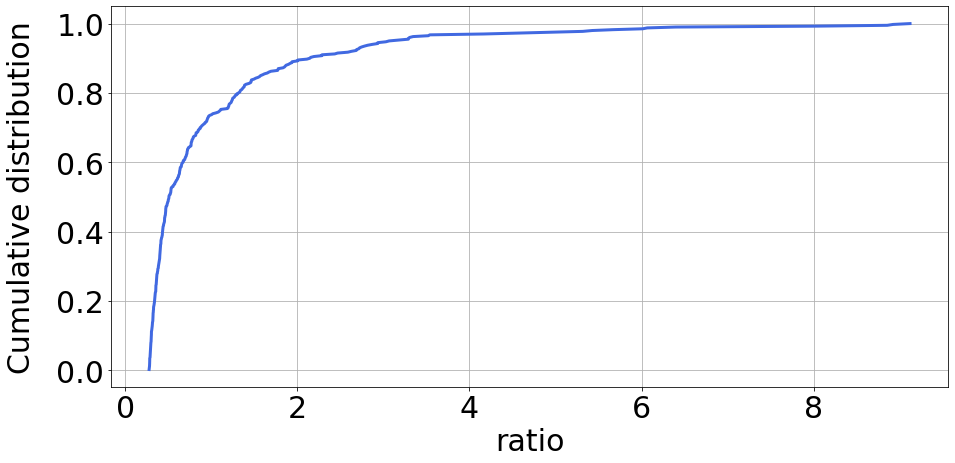

In [202]:
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams.update({'font.size': 30}) # 폰트사이즈 디폴트 설정
fig = plt.figure(figsize=(15,7))

# 상위 20% ratio 뽑기
ratio_top_20 = ratio[int(len(ratio)*0.8):]

# 배열의 모든 값을 초기화
y = np.zeros(len(ratio_top_20)) + (1 / len(ratio_top_20))

# 누적 비율 생성
cdf_top_20 = np.cumsum(y)

plt.grid(True)

plt.xlabel("ratio")
plt.ylabel("Cumulative distribution", labelpad=20)

plt.plot(ratio_top_20,cdf_top_20,linewidth=3, color = "royalblue")
fig.savefig('./sparse-to-dense-overhead-v2-second.png')
plt.show()

### 그래프 안에 그래프 그리기

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


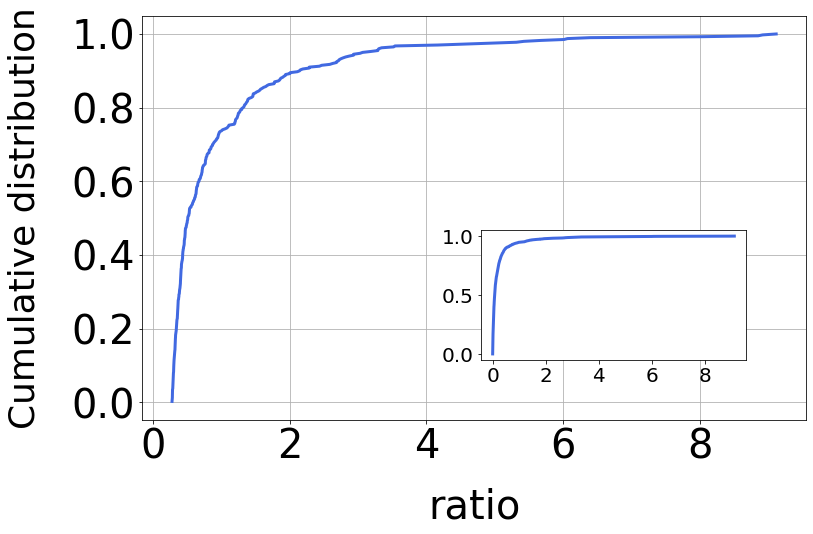

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes

# 전체 ratio
ratio = df['sp_todense_ratio']

# 배열의 모든 값 초기화
y = np.zeros(len(ratio)) + (1 / len(ratio))
# 누적 비율 생성
cdf = np.cumsum(y)

# 상위 20% ratio
ratio_top_20 = ratio[int(len(ratio)*0.8):]

# 배열의 모든 값 초기화
y = np.zeros(len(ratio_top_20)) + (1 / len(ratio_top_20))
# 누적 비율 생성
cdf_top_20 = np.cumsum(y)

##########################################################################################

fontsize = 40

plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=fontsize)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=fontsize)  # y축 눈금 폰트 크기

fig = plt.figure(figsize=(12,8)) # figure 크기 설정

# main subplot 추가
ax = fig.add_subplot(111) 

ax.grid(True)
ax.set_xlabel("ratio", labelpad=20)
ax.set_ylabel("Cumulative distribution", labelpad=30, fontsize=fontsize*0.9)
ax.set_yticks([0,0.2, 0.4, 0.6, 0.8, 1.0])

ax.plot(ratio_top_20,cdf_top_20, linewidth=3, color = "royalblue")

# main subplot 에 insert subplot 추가
ax_insert = inset_axes(ax, width="40%", height=1.8, loc=4, borderpad=2)

ax_insert.tick_params(labelsize=20)
ax_insert.set_xticks([0,2,4,6,8])
ax_insert.set_yticks([0,0.5,1.0])

# insert subplot 내부 표현
ax_insert.plot(ratio,cdf, linewidth=3, color = "royalblue")

fig.tight_layout()
fig.savefig('./sparse-to-dense-overhead-v2-total.png')

plt.show()